# test

In [40]:
import matplotlib
from matplotlib import pyplot as plt
from scipy import ndimage
import numpy as np
from WENO import *

pi = np.pi
n=30
x=np.linspace(-pi-0.1,pi/2,n+1)[1:]
dx=x[2]-x[1]
cell_centers=x-dx/2
def f_exact(x):
    #x=np.mod(x, 2*np.pi)
    return -(np.sin(x)*(x<=0)+np.cos(x)*(x>0))
                  
vave=np.zeros_like(cell_centers);
x_inner=np.linspace(-dx/2,dx/2,20)[1:]
dx_inner=x_inner[2]-x_inner[1]
vave = np.array([np.sum(f_exact(x_inner + c))*dx_inner/dx for c in cell_centers])

#vave=np.roll(vave,10)
w=WENO(3,300)
w.reconstruct(vave);

ImportError: attempted relative import with no known parent package

<IPython.core.display.Javascript object>


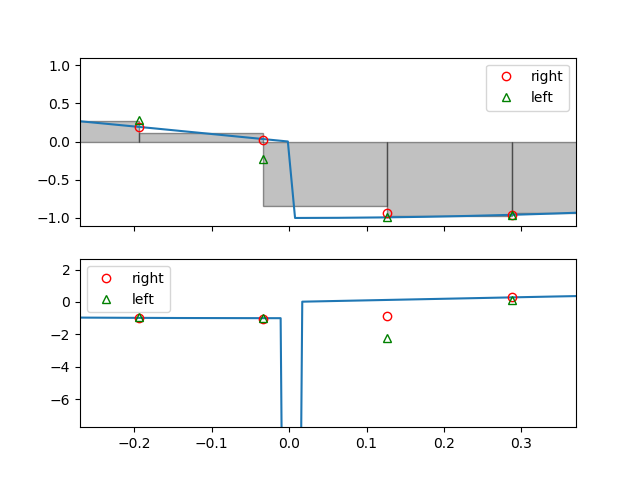

In [11]:
%matplotlib notebook
w=WENO(3,dx)
recs=w.all_reconstructions(vave)
ws=w.weights(vave)
left, right, dleft, dright=w.reconstruct(vave)

f, axs=plt.subplots(2,1,sharex=True,sharey=False)
xhr=np.linspace(x[0],x[-1],501)[1:];
fhr=f_exact(xhr)
fphr=(np.roll(fhr,-1)-np.roll(fhr,1))/(2*(xhr[2]-xhr[1]))
axs[0].plot(xhr,fhr)
axs[0].bar(cell_centers,vave,dx,color=[.4,.4,.4],alpha=.4,edgecolor='k')
#for i,ww in enumerate():
#    axs[1].plot(cell_centers,ww,color='mgb'[i],label='%d'%i)
axs[0].plot(cell_centers+dx/2, right,'o',label='right',color='r',mfc='none')
axs[0].plot(cell_centers+dx/2, left,'^',label='left',color='g',mfc='none')
axs[0].legend()
# axs[1].legend()

axs[1].plot(xhr,fphr)
#axs[1].set_ylim([-1.1,1.1])
axs[1].plot(cell_centers+dx/2, dright,'o',label='right',color='r',mfc='none')
axs[1].plot(cell_centers+dx/2, dleft,'^',label='left',color='g',mfc='none')
axs[1].legend()

# Integrate

In [6]:
%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pde_superresolution as pde

In [27]:
eq = pde.equations.ConservativeBurgersEquation(400, random_seed=41123)

In [28]:
bl=pde.integrate.integrate_exact(eq)
weno = pde.integrate.WENODifferentiator(eq)
we=pde.integrate._integrate(eq, weno)

<IPython.core.display.Javascript object>


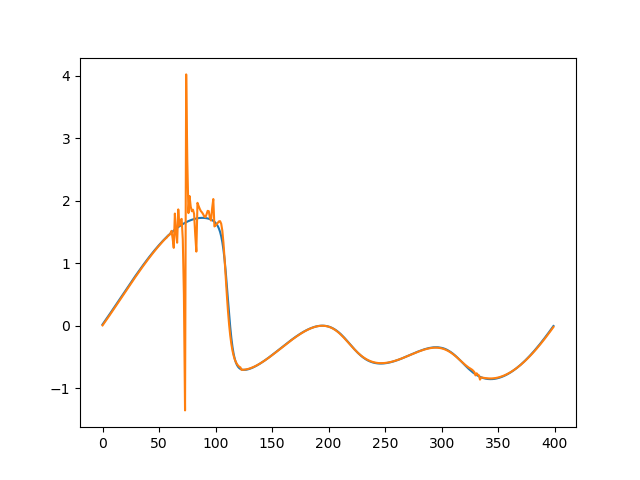

In [39]:
plt.plot(bl.y[23])
plt.plot(we.y[23])

In [37]:
we.time[23]

<xarray.DataArray 'time' ()>
array(1.15)
Coordinates:
    time       float64 1.15
    num_evals  int64 1532

In [14]:
we.y

<xarray.DataArray 'y' (time: 201, x: 400)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [-0.0019  ,  0.000618,  0.003173, ..., -0.0092  , -0.006812, -0.004378],
       [-0.003343,  0.001684,  0.006642, ..., -0.017765, -0.012968, -0.008219],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]])
Coordinates:
  * time       (time) float64 0.0 0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.4 0.45 ...
  * x          (x) float64 0.0 0.01571 0.03142 0.04712 0.06283 0.07854 ...
    num_evals  int64 1532